In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# 数据导入
## 多分类：随机森林，梯度提升，K近邻，朴素贝叶斯，MLP,最近质心分类，核岭回归，被动攻击分类，隐马尔可夫模型，CNN,GNN,transformer，SGD 分类器

In [2]:
dataset= r'dataset-RFE.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
    # 读取数据
X = data.values[:, :-1]
y = data.values[:, -1]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 归一化数据
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
feature_names = list(data.columns[:-1])

In [5]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

# 确保 y_train 是 Pandas Series
y_train_series = pd.Series(y_train_original)

# 计算类别分布
y_train_counts = y_train_series.value_counts()

# 定义SMOTE采样策略
sampling_grid = [
    {1: int(y_train_counts.get(1, 0) * factor),
     2: int(y_train_counts.get(2, 0) * factor),
     3: int(y_train_counts.get(3, 0) * 1.0)}
    for factor in [1.2, 1.5, 2.0]
]

# 先测试 SMOTE 是否能运行
smote_test = SMOTE(sampling_strategy=sampling_grid[0], k_neighbors=2, random_state=42)
try:
    X_resampled, y_resampled = smote_test.fit_resample(X_train_original, y_train_original)
    print("SMOTE 运行成功，样本分布：", pd.Series(y_resampled).value_counts())
except ValueError as e:
    print("SMOTE 失败:", e)

# 定义网格搜索参数
param_grid = {
    'smote__sampling_strategy': sampling_grid,
    'smote__k_neighbors': [1, 2, 3],  # 降低 k_neighbors 以防止错误
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# 构建Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE 过采样
    ('classifier', RandomForestClassifier(random_state=42))  # 训练分类模型
])

# 进行网格搜索
grid_search = GridSearchCV(pipeline, param_grid, scoring=make_scorer(f1_score, average='weighted'), cv=10, n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 评估测试集
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_original)
print("Best model F1 score:", f1_score(y_test_original, y_pred, average='weighted'))

NameError: name 'y_train_original' is not defined

In [ ]:

from imblearn.over_sampling import SMOTE
import pandas as pd

# 获取最佳的采样策略
best_sampling_strategy = grid_search.best_params_["smote__sampling_strategy"]
best_k_neighbors = grid_search.best_params_["smote__k_neighbors"]

# 使用最佳参数进行训练集 SMOTE 采样
sampler_train = SMOTE(sampling_strategy=best_sampling_strategy, random_state=42, k_neighbors=best_k_neighbors)
X_train, y_train = sampler_train.fit_resample(X_train_original, y_train_original)

# **测试集不需要过采样**，通常 SMOTE 只用于训练集。
# 如果你想对测试集进行采样，需要确保测试集类别不丢失。
print("\nResampled training set class distribution:")
print(pd.Series(y_train).value_counts())

In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE

# # 将 y_train 和 y_test 转换为 Pandas Series
# y_train_series = pd.Series(y_train_original)
# y_test_series = pd.Series(y_test_original)

# # 获取训练集和测试集的类别分布
# train_class_counts = y_train_series.value_counts()
# test_class_counts = y_test_series.value_counts()
# print("Original training set class distribution:")
# print(train_class_counts)
# print("\nOriginal test set class distribution:")
# print(test_class_counts)
# #··············································#······································第一种采样策略···
# # # 定义采样策略（将所有类别均衡到最多类别的样本数量）
# # max_samples_train = train_class_counts.max()  # 训练集最多类别的样本数量
# # max_samples_test = test_class_counts.max()  # 测试集最多类别的样本数量
# # sampling_strategy_train = {
# #     1: max_samples_train,  # 将类别 1 的样本数量增加到 max_samples_train
# #     2: max_samples_train,  # 将类别 2 的样本数量增加到 max_samples_train
# #     3: max_samples_train   # 将类别 3 的样本数量增加到 max_samples_train
# # }
# # sampling_strategy_test = {
# #     1: max_samples_test,  # 将类别 1 的样本数量增加到 max_samples_test
# #     2: max_samples_test,  # 将类别 2 的样本数量增加到 max_samples_test
# #     3: max_samples_test   # 将类别 3 的样本数量增加到 max_samples_test
# # }
# #··········································第二种策略·······························································
# # 根据数据分布设置目标样本数量
# sampling_strategy_train = {
#     1: int(train_class_counts[1] * 2.0),  # 类别 1 的样本数量增加 20%
#     2: int(train_class_counts[2] * 1.5),  # 类别 2 的样本数量增加 50%
#     3: int(train_class_counts[3] * 1.0)   # 类别 3 的样本数量保持不变
# }
# sampling_strategy_test = {
#     1: int(test_class_counts[1] * 1.2),   # 类别 1 的样本数量增加 20%
#     2: int(test_class_counts[2] * 1.5),   # 类别 2 的样本数量增加 50%
#     3: int(test_class_counts[3] * 1.0)    # 类别 3 的样本数量保持不变
# }
# # 初始化 SMOTE 采样器（设置较小的 n_neighbors）
# sampler_train = SMOTE(sampling_strategy=sampling_strategy_train, random_state=42, k_neighbors=2)
# sampler_test = SMOTE(sampling_strategy=sampling_strategy_test, random_state=42, k_neighbors=2)

# # 对训练集进行采样
# X_train, y_train = sampler_train.fit_resample(X_train_original, y_train_original)

# # 对测试集进行采样
# X_test, y_test = sampler_test.fit_resample(X_test_original, y_test_original)

# # 检查采样后的类别分布
# train_resampled_class_counts = pd.Series(y_train).value_counts()
# test_resampled_class_counts = pd.Series(y_test).value_counts()
# print("\nResampled training set class distribution:")
# print(train_resampled_class_counts)
# print("\nResampled test set class distribution:")
# print(test_resampled_class_counts)

# 随机森林

In [6]:
# 计算类别权重
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

print("类别权重:", class_weight_dict)

类别权重: {1.0: 4.5, 2.0: 1.3846153846153846, 3.0: 0.4864864864864865}


In [7]:
#  前面的自动计算权重如果效果不好，后面可以再手动定义
class_weight_dict = {1.0: 7.0, 2.0: 5.0, 3.0: 0.5}

In [8]:
# 寻找超参数
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# 定义模型
model = RandomForestClassifier(random_state=42)

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 节点分裂的最小样本数
    'min_samples_leaf': [1, 2, 4]  # 叶节点的最小样本数
}

# 网格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import joblib


# 训练多分类模型（随机森林）并应用类别权重
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weight_dict  # 加入类别权重
)

model.fit(X_train, y_train)

# 保存模型
joblib.dump(model, "RF.pkl")
print("\n🎉 模型已保存")


🎉 模型已保存


In [10]:
# 在训练集上的预测
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)

# 在测试集上的预测
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)

In [11]:
from sklearn.metrics import classification_report

print("\n📊 训练集评估:")
print(classification_report(y_train, y_train_pred))

print("\n📊 测试集评估:")
print(classification_report(y_test, y_test_pred))



📊 训练集评估:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00        37

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


📊 测试集评估:
              precision    recall  f1-score   support

         1.0       0.67      0.33      0.44         6
         2.0       0.50      0.50      0.50        12
         3.0       0.76      0.89      0.82        18

    accuracy                           0.67        36
   macro avg       0.64      0.57      0.59        36
weighted avg       0.66      0.67      0.65        36



Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Training Set Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00        37

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Training Set Confusion Matrix:
[[ 4  0  0]
 [ 0 13  0]
 [ 0  0 37]]


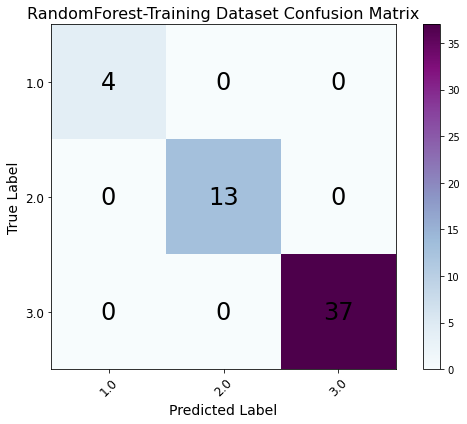

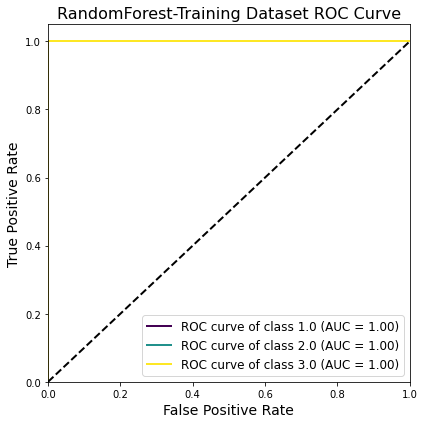


Test Set Metrics:
Accuracy: 0.6667
Precision: 0.6587
Recall: 0.6667
F1 Score: 0.6510

Test Set Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.33      0.44         6
         2.0       0.50      0.50      0.50        12
         3.0       0.76      0.89      0.82        18

    accuracy                           0.67        36
   macro avg       0.64      0.57      0.59        36
weighted avg       0.66      0.67      0.65        36


Test Set Confusion Matrix:
[[ 2  4  0]
 [ 1  6  5]
 [ 0  2 16]]


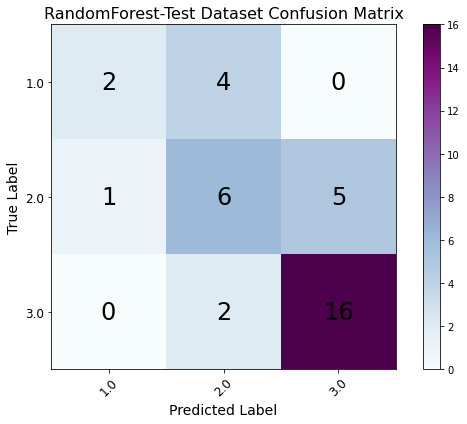

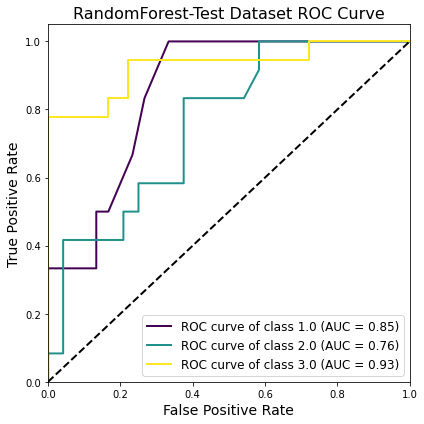

In [12]:
# 评估训练集
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# 训练集混淆矩阵
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Set Confusion Matrix:")
print(train_conf_matrix)

# 绘制训练集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(train_conf_matrix, cmap=plt.cm.BuPu)
plt.title("RandomForest-Training Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, np.unique(y_train), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y_train), fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# 在混淆矩阵中添加数字
for i in range(train_conf_matrix.shape[0]):
    for j in range(train_conf_matrix.shape[1]):
        plt.text(j, i, train_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("RandomForest_train_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 训练集 ROC 曲线
n_classes = len(np.unique(y))
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))  # 显式指定 classes

# 计算每个类别的 ROC 曲线和 AUC
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
for i, class_label in enumerate(np.unique(y_train)):
    train_fpr[i], train_tpr[i], _ = roc_curve(y_train_binarized[:, i], y_train_pred_proba[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

# 创建渐变色映射
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))

# 绘制训练集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y_train), colors):
    plt.plot(train_fpr[i], train_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {train_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('RandomForest-Training Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("RandomForest_train_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 评估测试集
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# 测试集混淆矩阵
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Set Confusion Matrix:")
print(test_conf_matrix)

# 绘制测试集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(test_conf_matrix, cmap=plt.cm.BuPu)
plt.title("RandomForest-Test Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y_test), fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# 在混淆矩阵中添加数字
for i in range(test_conf_matrix.shape[0]):
    for j in range(test_conf_matrix.shape[1]):
        plt.text(j, i, test_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("RandomForest_test_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 测试集 ROC 曲线
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# 计算每个类别的 ROC 曲线和 AUC
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
for i, class_label in enumerate(np.unique(y_test)):
    test_fpr[i], test_tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

# 绘制测试集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y_test), colors):
    plt.plot(test_fpr[i], test_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {test_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('RandomForest-Test Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("RandomForest_test_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 最近质心分类


🎉 模型已保存为 NearestCentroid.pkl
Training Set Metrics (Nearest Centroid):
Accuracy: 0.8519
Precision: 0.8702
Recall: 0.8519
F1 Score: 0.8558

Training Set Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.50      0.57         4
         2.0       0.65      0.85      0.73        13
         3.0       0.97      0.89      0.93        37

    accuracy                           0.85        54
   macro avg       0.76      0.75      0.74        54
weighted avg       0.87      0.85      0.86        54


Training Set Confusion Matrix:
[[ 2  2  0]
 [ 1 11  1]
 [ 0  4 33]]


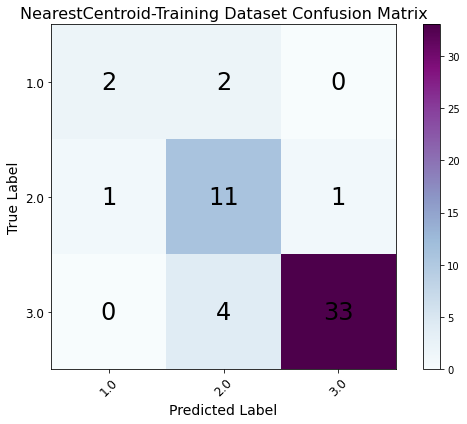


Test Set Metrics (Nearest Centroid):
Accuracy: 0.6389
Precision: 0.6506
Recall: 0.6389
F1 Score: 0.6441

Test Set Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.33      0.33         6
         2.0       0.46      0.50      0.48        12
         3.0       0.88      0.83      0.86        18

    accuracy                           0.64        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.65      0.64      0.64        36


Test Set Confusion Matrix:
[[ 2  4  0]
 [ 4  6  2]
 [ 0  3 15]]


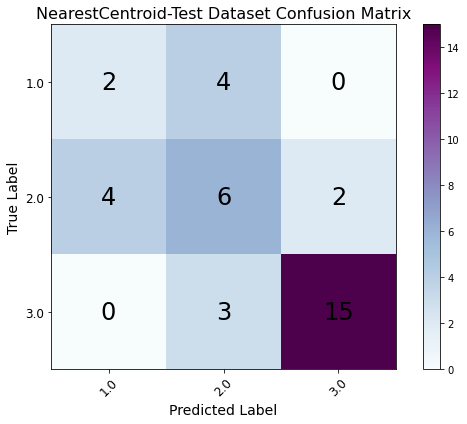

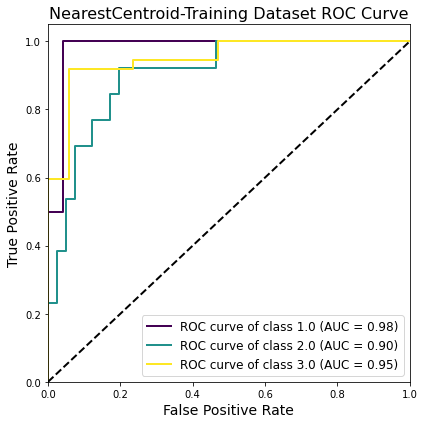

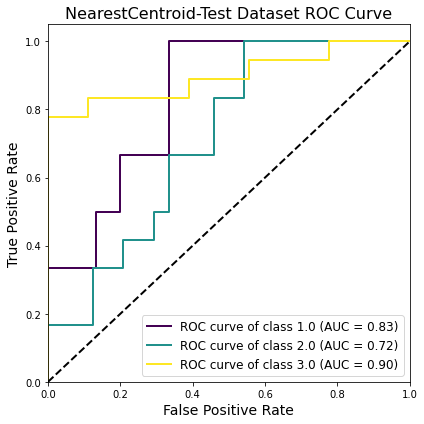

In [13]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
from sklearn.neighbors import NearestCentroid
import numpy as np

class WeightedNearestCentroid(NearestCentroid):
    def fit(self, X, y):
        """计算加权质心"""
        unique_classes = np.unique(y)
        self.centroids_ = np.array([
            np.average(X[y == cls], axis=0, weights=[class_weight_dict[cls]] * len(X[y == cls]))
            for cls in unique_classes
        ])
        self.classes_ = unique_classes
        return self

model = WeightedNearestCentroid()
model.fit(X_train, y_train)

joblib.dump(model, "NearestCentroid.pkl")
print("\n🎉 模型已保存为 NearestCentroid.pkl")

# 在训练集上的预测
y_train_pred = model.predict(X_train)

# 在测试集上的预测
y_test_pred = model.predict(X_test)

# 评估训练集
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Set Metrics (Nearest Centroid):")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# 训练集混淆矩阵
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Set Confusion Matrix:")
print(train_conf_matrix)

# 绘制训练集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(train_conf_matrix, cmap=plt.cm.BuPu)
plt.title("NearestCentroid-Training Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y), fontsize=12)  # 修正这里
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)


# 在混淆矩阵中添加数字
for i in range(train_conf_matrix.shape[0]):
    for j in range(train_conf_matrix.shape[1]):
        plt.text(j, i, train_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("NearestCentroid_train_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 评估测试集
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Metrics (Nearest Centroid):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# 测试集混淆矩阵
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Set Confusion Matrix:")
print(test_conf_matrix)

# 绘制测试集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(test_conf_matrix, cmap=plt.cm.BuPu)
plt.title("NearestCentroid-Test Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y), fontsize=12)

plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# 在混淆矩阵中添加数字
for i in range(test_conf_matrix.shape[0]):
    for j in range(test_conf_matrix.shape[1]):
        plt.text(j, i, test_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("NearestCentroid_test_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 计算距离
def calculate_distances(X, centroids):
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

centroids = model.centroids_

# 训练集距离和概率
y_train_distances = calculate_distances(X_train, centroids)
y_train_proba = np.exp(-y_train_distances)
y_train_proba = y_train_proba / y_train_proba.sum(axis=1, keepdims=True)

# 测试集距离和概率
y_test_distances = calculate_distances(X_test, centroids)
y_test_proba = np.exp(-y_test_distances)
y_test_proba = y_test_proba / y_test_proba.sum(axis=1, keepdims=True)

# 训练集 ROC 曲线
n_classes = len(np.unique(y))
y_train_binarized = label_binarize(y_train, classes=np.unique(y))

train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
for i, class_label in enumerate(np.unique(y)):
    train_fpr[i], train_tpr[i], _ = roc_curve(y_train_binarized[:, i], y_train_proba[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

# 创建渐变色映射
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))

# 绘制训练集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y), colors):
    plt.plot(train_fpr[i], train_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {train_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('NearestCentroid-Training Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("NearestCentroid_train_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 测试集 ROC 曲线
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
for i, class_label in enumerate(np.unique(y)):
    test_fpr[i], test_tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

# 绘制测试集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y), colors):
    plt.plot(test_fpr[i], test_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {test_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('NearestCentroid-Test Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("NearestCentroid_test_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# 计算类别权重
class_counts = pd.Series(y_train).value_counts()
class_weights = {cls: max(class_counts) / count for cls, count in class_counts.items()}


model = LGBMClassifier(
    boosting_type="gbdt",
    objective="multiclass",
    num_class=len(class_counts), 
    class_weight=class_weights,
    random_state=42
)

# 设置超参数搜索范围
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40],
}

# 交叉验证搜索
grid_search = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)  # ✅ 修正：y_train

# 输出最佳参数
print("\nBest parameters:", grid_search.best_params_)
print("\nBest model F1 score:", grid_search.best_score_)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 保存最佳模型
joblib.dump(best_model, "best_lightgbm_model.pkl")
print("\n🎉 模型已保存为 best_lightgbm_model.pkl")

# 预测测试集
y_test_pred = best_model.predict(X_test)  # ✅ 修正：X_test
y_test_pred_proba = best_model.predict_proba(X_test)

# 评估训练集
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# 训练集混淆矩阵
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Set Confusion Matrix:")
print(train_conf_matrix)

# 绘制训练集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(train_conf_matrix, cmap=plt.cm.BuPu)
plt.title("LightGBM-Training Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y), fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# 在混淆矩阵中添加数字
for i in range(train_conf_matrix.shape[0]):
    for j in range(train_conf_matrix.shape[1]):
        plt.text(j, i, train_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("LightGBM_train_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 训练集 ROC 曲线
n_classes = len(np.unique(y))
y_train_binarized = label_binarize(y_train, classes=np.unique(y))  # 显式指定 classes

# 计算每个类别的 ROC 曲线和 AUC
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
for i, class_label in enumerate(np.unique(y)):
    train_fpr[i], train_tpr[i], _ = roc_curve(y_train_binarized[:, i], y_train_pred_proba[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

# 创建渐变色映射
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))

# 绘制训练集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y), colors):
    plt.plot(train_fpr[i], train_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {train_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('RandomForest-Training Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("LightGBM_train_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 评估测试集
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# 测试集混淆矩阵
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Set Confusion Matrix:")
print(test_conf_matrix)

# 绘制测试集混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(test_conf_matrix, cmap=plt.cm.BuPu)
plt.title("LightGBM-Test Dataset Confusion Matrix", fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45, fontsize=12)
plt.yticks(tick_marks, np.unique(y), fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# 在混淆矩阵中添加数字
for i in range(test_conf_matrix.shape[0]):
    for j in range(test_conf_matrix.shape[1]):
        plt.text(j, i, test_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=24)

plt.tight_layout()
plt.savefig("LightGBM_test_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 测试集 ROC 曲线
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# 计算每个类别的 ROC 曲线和 AUC
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
for i, class_label in enumerate(np.unique(y)):
    test_fpr[i], test_tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

# 绘制测试集 ROC 曲线
plt.figure(figsize=(6, 6))
for i, class_label, color in zip(range(n_classes), np.unique(y), colors):
    plt.plot(test_fpr[i], test_tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_label} (AUC = {test_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('RandomForest-Test Dataset ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("LightGBM_test_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


# lightgbm